<a href="https://colab.research.google.com/github/coyosi-hub/coyosi/blob/master/PruningExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random

In [2]:
np.random.seed(0)

In [3]:

#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:


print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:

#look for the condition throw error otherwise
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

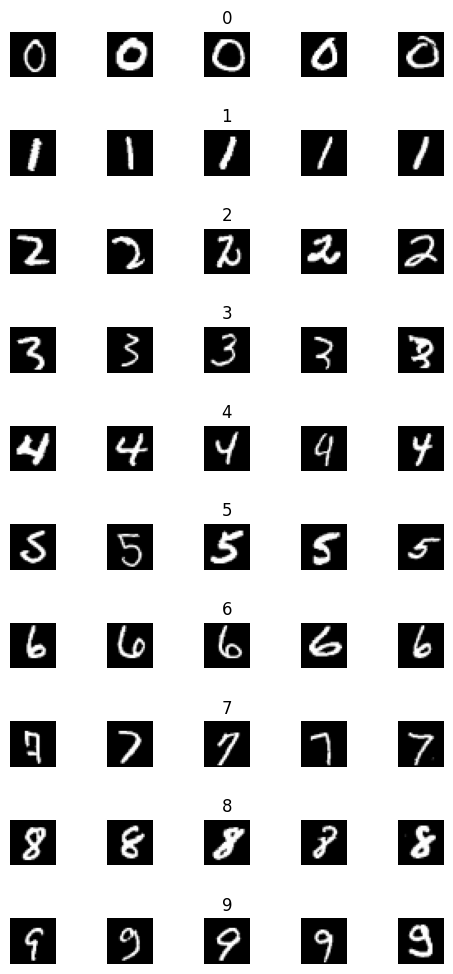

In [6]:

num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

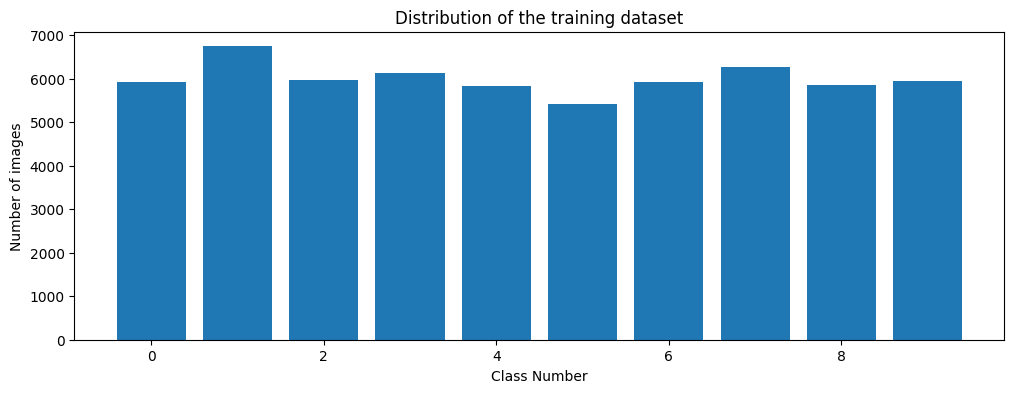

In [7]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [8]:


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [9]:


#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [10]:


#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [11]:

def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01),
                loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model        

In [12]:


model = create_model()
print(model.summary())
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:

history = model.fit(X_train, y_train, validation_split=0.1,
         epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 3s 5ms/step - loss: 0.5822 - accuracy: 0.8144 - val_loss: 0.2545 - val_accuracy: 0.9263
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2927 - accuracy: 0.9123 - val_loss: 0.2200 - val_accuracy: 0.9363
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2691 - accuracy: 0.9186 - val_loss: 0.2045 - val_accuracy: 0.9372
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2507 - accuracy: 0.9244 - val_loss: 0.2275 - val_accuracy: 0.9345
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2418 - accuracy: 0.9280 - val_loss: 0.1954 - val_accuracy: 0.9415
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2284 - accuracy: 0.9319 - val_loss: 0.2015 - val_accuracy: 0.9420
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2336 - accuracy: 0.9296 - val_loss: 0.1961 - val_accuracy: 0.9440
Epoch 

Text(0.5, 0, 'epoch')

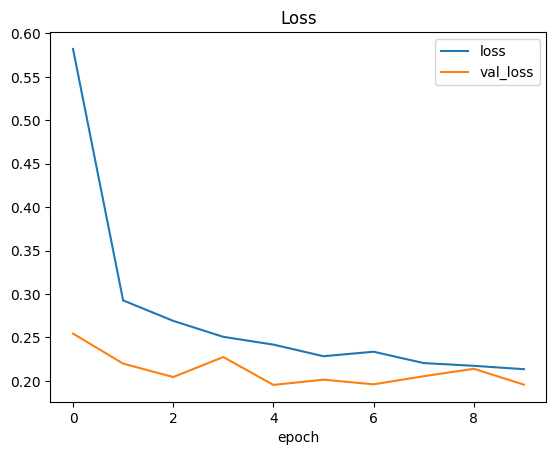

In [16]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [18]:

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.2428695559501648
Test Accuracy: 0.9300000071525574


In [23]:
pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [26]:
from tensorflow_model_optimization.python.core.sparsity.keras import prune
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule

In [29]:
import tempfile
import os

import tensorflow as tf
import numpy as np

from tensorflow import keras

%load_ext tensorboard

In [ ]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture.
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
  train_images,
  train_labels,
  epochs=4,
  validation_split=0.1,
)

Epoch 1/4
1688/1688 [==============================] - 28s 16ms/step - loss: 0.3342 - accuracy: 0.9039 - val_loss: 0.1635 - val_accuracy: 0.9557
Epoch 2/4
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1550 - accuracy: 0.9552 - val_loss: 0.1053 - val_accuracy: 0.9720
Epoch 3/4
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1071 - accuracy: 0.9683 - val_loss: 0.0827 - val_accuracy: 0.9780
Epoch 4/4
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0824 - accuracy: 0.9756 - val_loss: 0.0770 - val_accuracy: 0.9798


In [ ]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)